In [1]:
# install.packages('tidyverse', repos = "http://cran.us.r-project.org")
library('tidyverse')

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.3.2
√ tibble  2.1.3     √ dplyr   0.8.1
√ tidyr   0.8.3     √ stringr 1.2.0
√ readr   1.1.1     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
#library('dplyr')
library('RMeCab')

In [3]:
par(mfrow=c(1,1)) 

# 実習②『こころ』の分析

In [4]:
getwd()

[1] "C:/Users/satoc/projects/lecture2019"

In [5]:
kokoro = read.delim('data/kokoro.tsv', header=T, sep='\t', stringsAsFactor=F, fileEncoding='utf8')

In [6]:
#kokoro %>% head()

In [7]:
kokoro[1:2,] 

,part_id,section_id,paragraph_id,content
,<int>,<int>,<int>,<chr>
1,1,1,1,私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執っても心持は同じ事である。よそよそしい頭文字などはとても使う気にならない。
2,1,1,2,私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利用して海水浴に行った友達からぜひ来いという端書を受け取ったので、私は多少の金を工面して、出掛ける事にした。私は金の工面に二、三日を費やした。ところが私が鎌倉に着いて三日と経たないうちに、私を呼び寄せた友達は、急に国元から帰れという電報を受け取った。電報には母が病気だからと断ってあったけれども友達はそれを信じなかった。友達はかねてから国元にいる親たちに勧まない結婚を強いられていた。彼は現代の習慣からいうと結婚するにはあまり年が若過ぎた。それに肝心の当人が気に入らなかった。それで夏休みに当然帰るべきところを、わざと避けて東京の近くで遊んでいたのである。彼は電報を私に見せてどうしようと相談をした。私にはどうしていいか分らなかった。けれども実際彼の母が病気であるとすれば彼は固より帰るべきはずであった。それで彼はとうとう帰る事になった。せっかく来た私は一人取り残された。


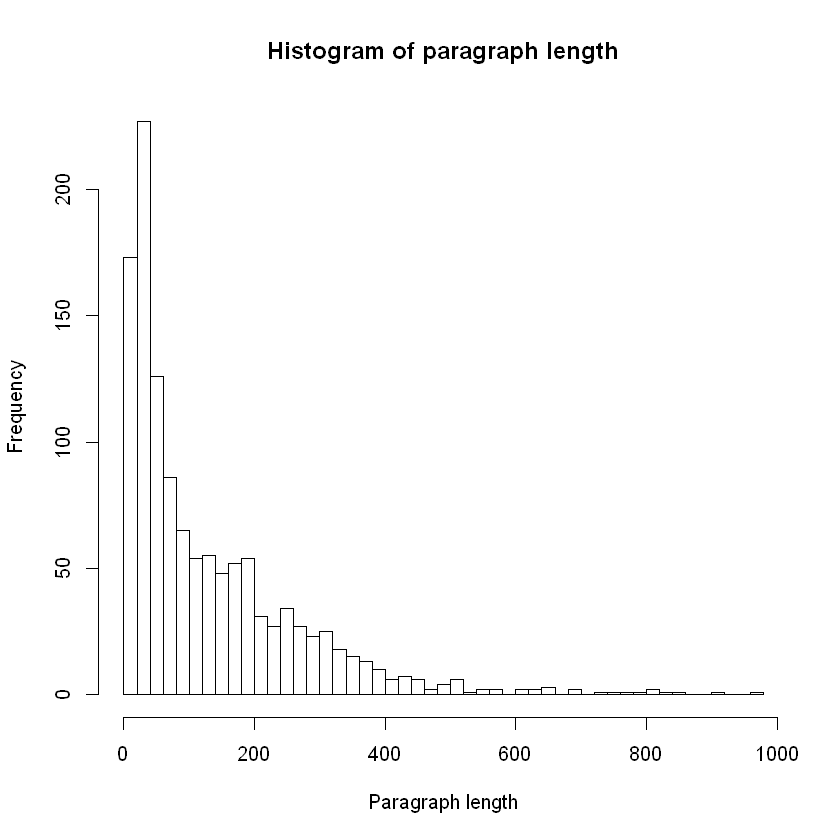

In [8]:
# 段落の長さの分布
kokoro[, 'content'] %>% str_length() %>% hist(breaks=40, xlab='Paragraph length', main='Histogram of paragraph length')

In [9]:
kokoro['length'] = kokoro[, 'content'] %>% str_length()

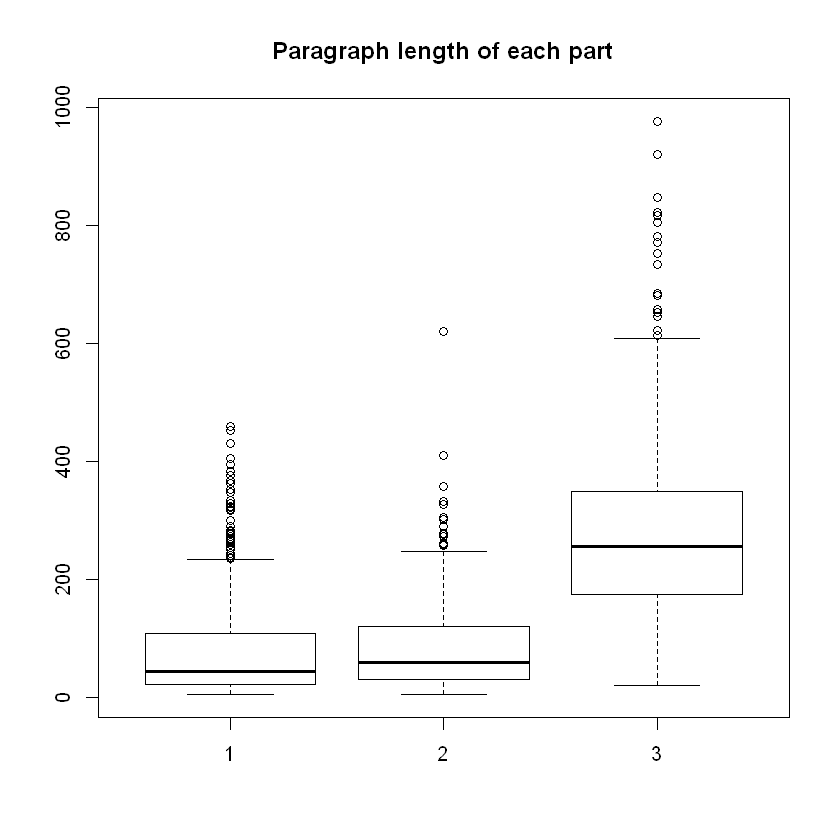

In [10]:
boxplot(length ~ part_id, data=kokoro, main='Paragraph length of each part')

In [11]:
# 全体を通すセクション用idを作る
kokoro['section_id2'] = kokoro['part_id'] * 100 + kokoro['section_id']

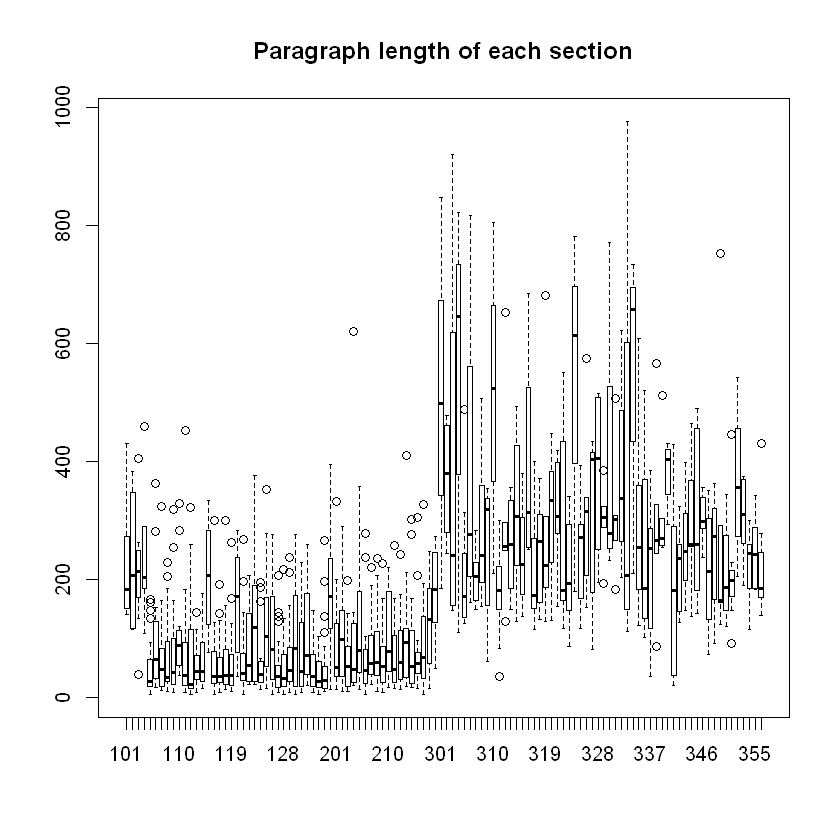

In [12]:
boxplot(length ~ section_id2, data=kokoro, main='Paragraph length of each section')

In [13]:
# 分析のため各話ごとに文章を結合する
parts = kokoro %>% group_by(part_id) %>% summarise(text = paste0(content, collapse=''))
parts = as.data.frame(parts)

In [14]:
dim(parts)

[1] 3 2

In [15]:
parts[, 'text'] %>% str_length() 

[1] 49137 25177 85670

In [16]:
count_noun = docMatrixDF(parts[,'text'], pos=c('名詞'))

to make data frame



In [17]:
# 全体を集計する
freq_noun = count_noun %>% rowSums()

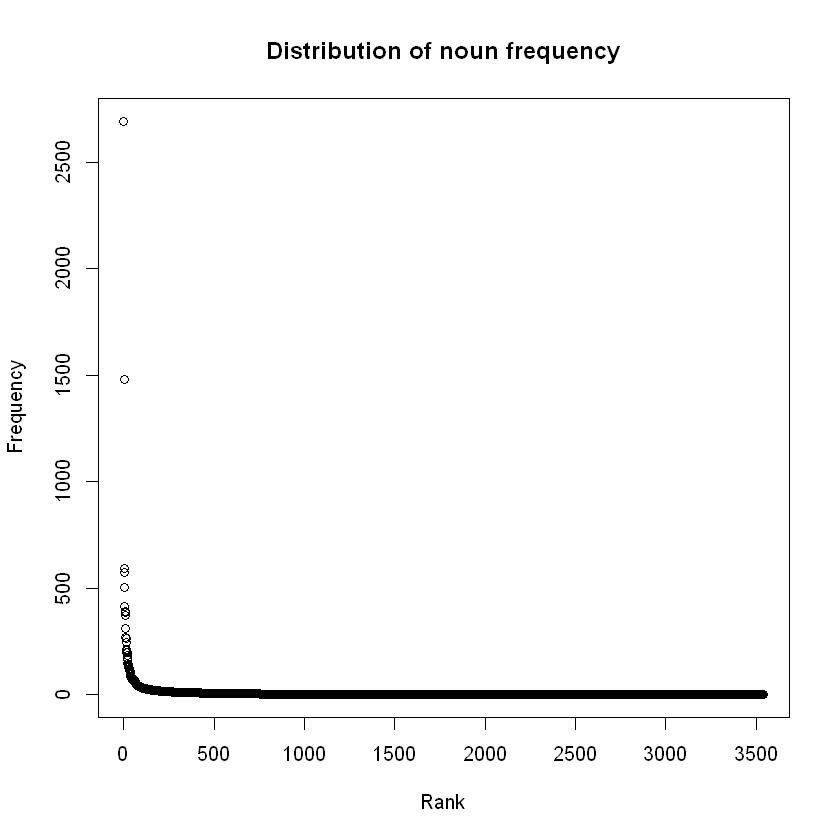

In [18]:
# 全体を集計する
freq_noun %>% sort(decreasing=T) %>% plot(main='Distribution of noun frequency', xlab='Rank', ylab='Frequency')

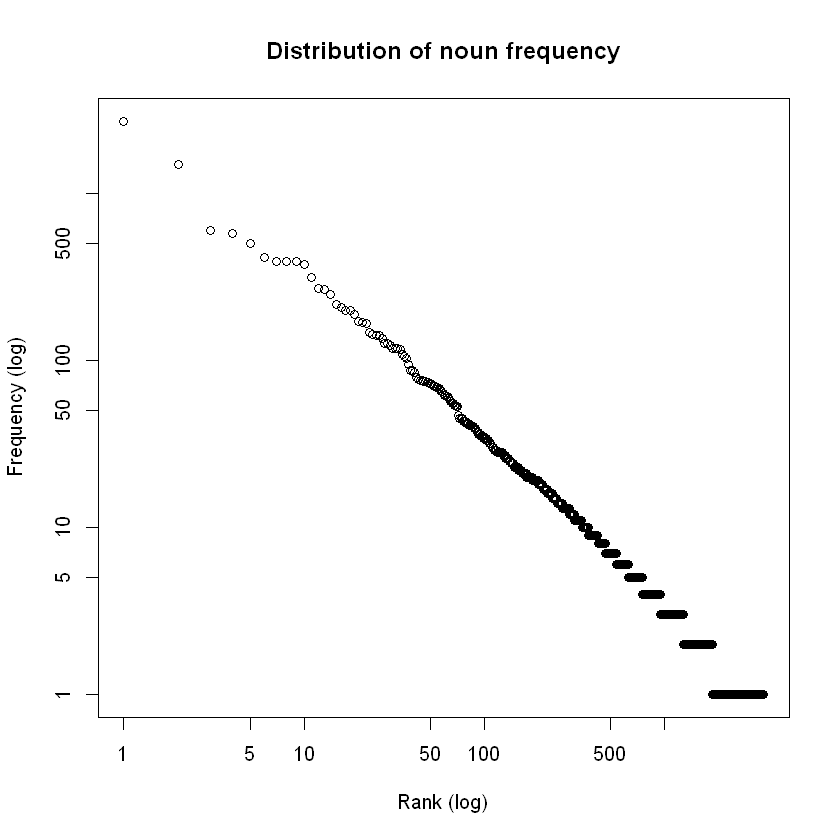

In [19]:
freq_noun %>% sort(decreasing=T) %>% plot(main='Distribution of noun frequency', xlab='Rank (log)', ylab='Frequency (log)', log='xy')

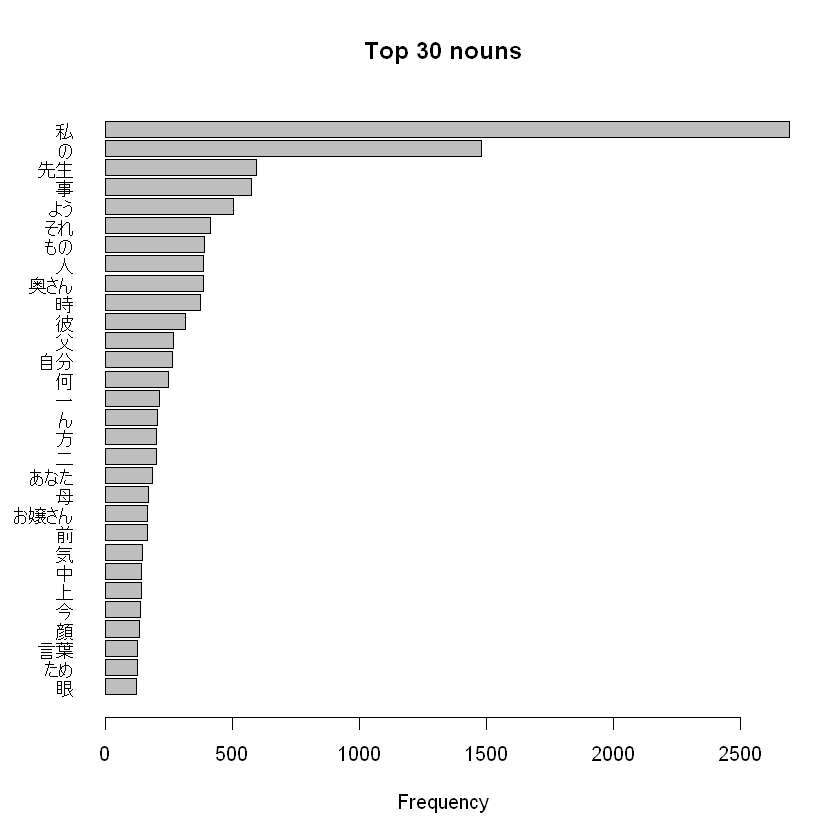

In [20]:
freq_noun %>% sort() %>% tail(30) %>% barplot(horiz=T, las=1, main='Top 30 nouns', xlab='Frequency')

In [21]:
stopwords = c('事','の','よう','それ','もの', '人', '何','一', 'ん','方','二','前','気','中','上','今','ため')

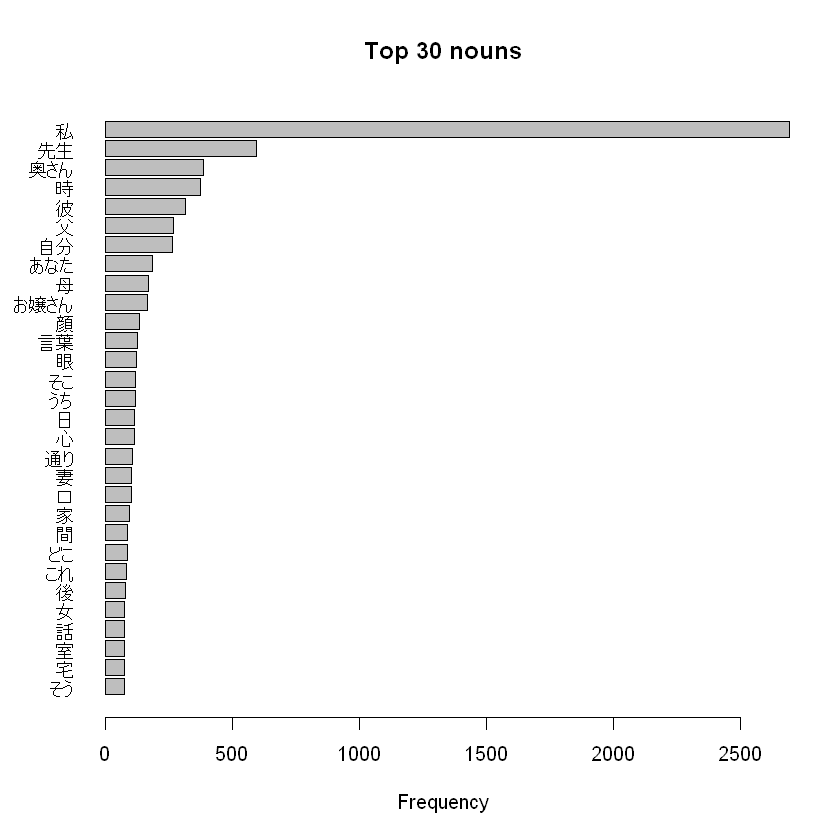

In [22]:
freq_noun[!names(freq_noun) %in% stopwords] %>% sort() %>% tail(30) %>% barplot(horiz=T, las=1, main='Top 30 nouns', xlab='Frequency')


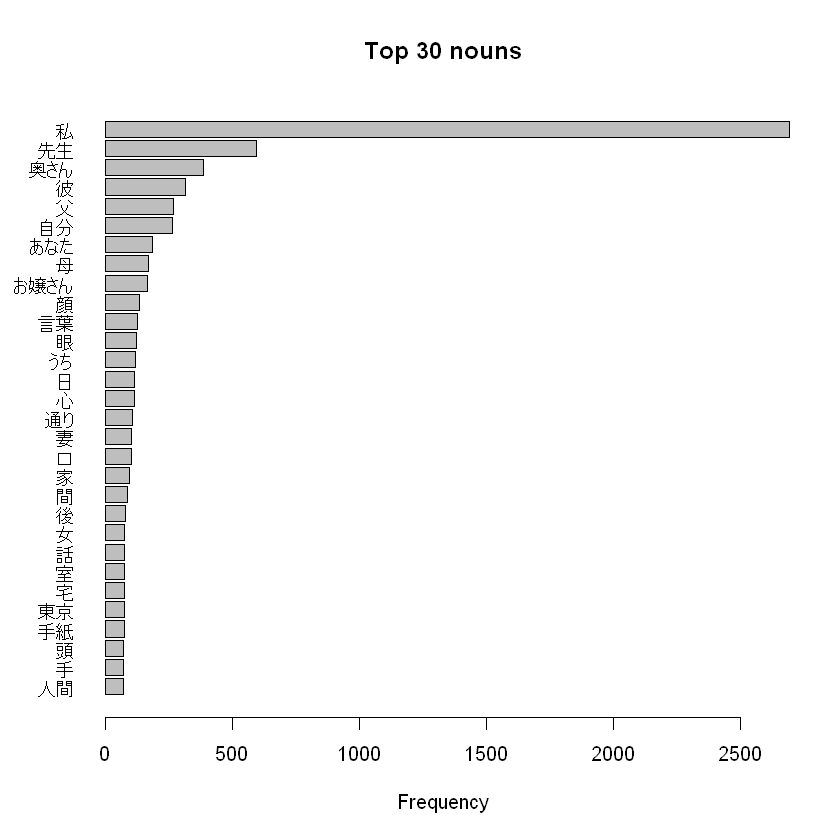

In [23]:
stopwords = c('事','の','よう','それ','もの', '人', '何','一', 'ん','方','二','前','気','中','上','今','ため', '時', 'そこ', 'どこ', 'これ', 'そう')
freq_noun[!names(freq_noun) %in% stopwords] %>% sort() %>% tail(30) %>% barplot(horiz=T, las=1, main='Top 30 nouns', xlab='Frequency')

In [24]:
# PCA Principal Component Analysis
mat = count_noun 
mat = mat[rowSums(mat) > 50, ]
mat = mat[!row.names(mat) %in% stopwords, ]
colnames(mat) = c('第一部', '第二部', '第三部')
mat_t = t(mat)

In [25]:
mat %>% head()

,第一部,第二部,第三部
あなた,70,10,107
うち,43,29,46
お嬢さん,0,0,168
ところ,16,13,39
意味,24,8,37
奥さん,183,7,198


In [26]:
(mat_t / colSums(mat)) 

,あなた,うち,お嬢さん,ところ,意味,奥さん,家,外,間,眼,...,頭,日,彼,病気,父,返事,母,問題,様子,話
第一部,0.027844073,0.01710422,0.00000000,0.006364360,0.009546539,0.072792363,0.009944312,0.007557677,0.013922037,0.01352426,...,0.009546539,0.01949085,0.004375497,0.011137629,0.019093079,0.005568815,0.008750994,0.0099443119,0.006364360,0.005568815
第二部,0.007225434,0.02095376,0.00000000,0.009393064,0.005780347,0.005057803,0.009393064,0.005057803,0.008670520,0.01445087,...,0.008670520,0.01372832,0.001445087,0.018063584,0.134393064,0.013005780,0.080202312,0.0007225434,0.010838150,0.006502890
第三部,0.024976657,0.01073763,0.03921569,0.009103641,0.008636788,0.046218487,0.013305322,0.008403361,0.009337068,0.01610644,...,0.008636788,0.01143791,0.070261438,0.002334267,0.008169935,0.004901961,0.008636788,0.0067693744,0.007002801,0.012371615


In [27]:
result = (mat_t / colSums(mat)) %>% prcomp()

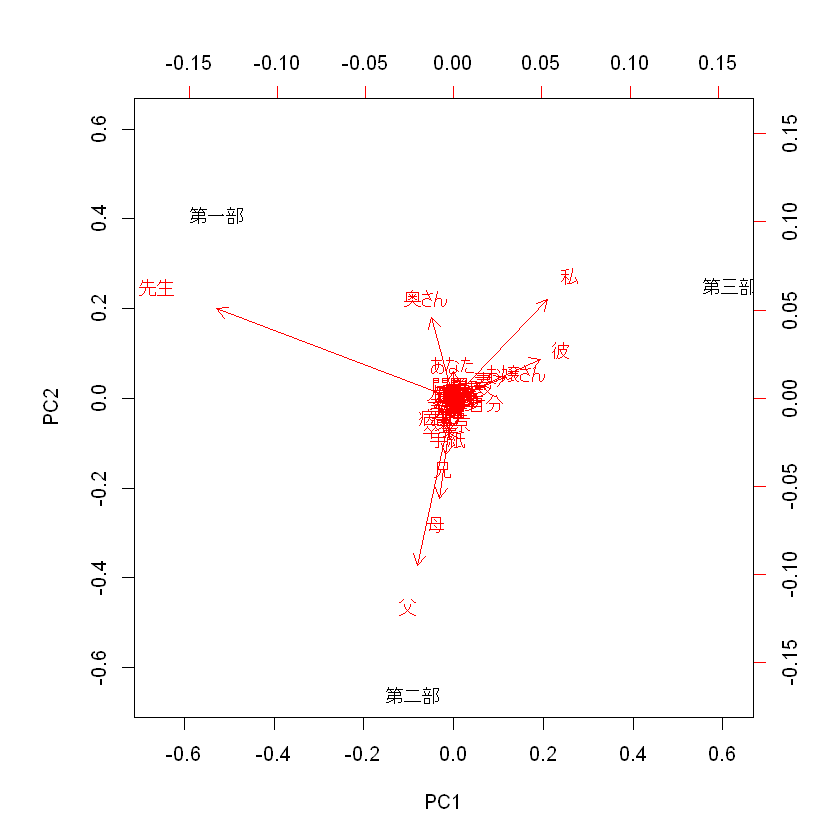

In [28]:
# 単語の頻度
biplot(result)
## べき分布なので、頻度の多い単語に引っ張られて他のがよくわからない

In [29]:
#result = log(mat + 1) %>% prcomp()

In [30]:
# 出現確率の比をとる
ratio = mat_t / colSums(mat)
ratio_t = t(ratio)

In [31]:
result = (ratio_t / colSums(ratio))  %>% prcomp()

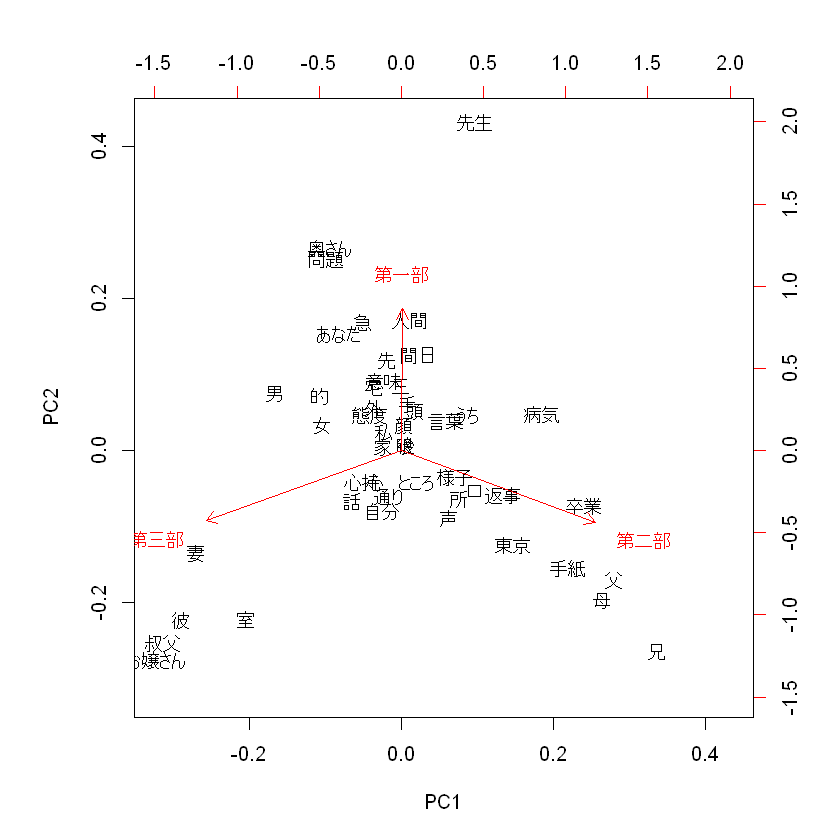

In [32]:
biplot(result)

In [33]:
count_noun = docMatrixDF(parts[,'text'], pos=c('名詞'), dic='dict/kokoro_sjis.dic')

to make data frame



In [34]:
# 共起分析
# バイグラム

In [35]:
bigram = docDF(parts,col='text', type=1, pos=c('名詞', '動詞', '形容詞'), N=2, nDF=1, dic='dict/kokoro_sjis.dic')

number of extracted terms = 28478
now making a data frame. wait a while!



In [36]:
#bigram %>% head()

In [37]:
# distribution
bigram['freq'] = bigram[,5:7] %>% rowSums() 

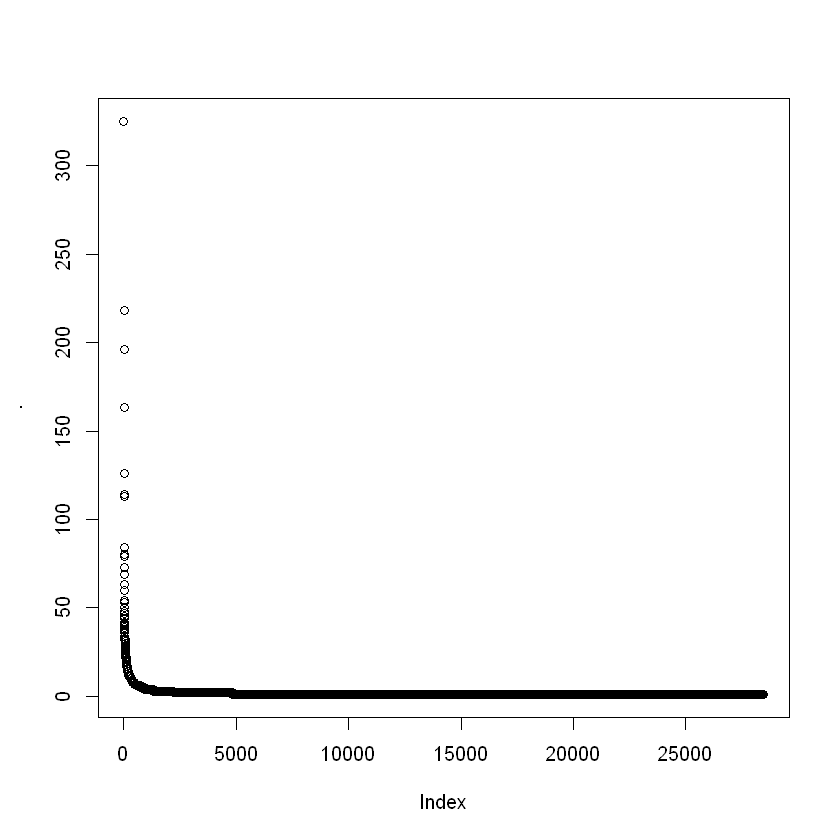

In [38]:
bigram[,'freq'] %>% sort(decreasing=T) %>% plot()

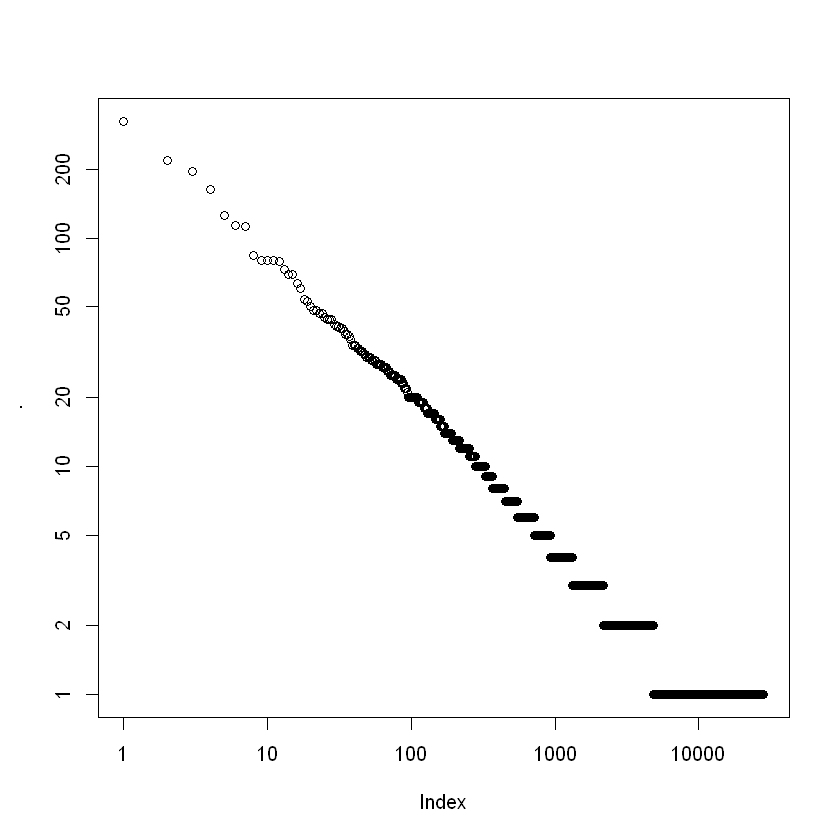

In [39]:
bigram[,'freq'] %>% sort(decreasing=T) %>% plot(log='xy')

In [40]:
library('igraph')


Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_frame

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [41]:
bigram[1,]

,N1,N2,POS1,POS2,Row1,Row2,Row3,freq
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,Ｋ,いい,名詞-形容詞,固有名詞-自立,0,0,1,1


In [42]:
net = bigram %>%  select(N1, N2, freq=Row1) %>% filter(freq > 20)  %>% filter(! N1 %in% stopwords) %>%  filter(! N2 %in% stopwords)

In [43]:
net[1,]

,N1,N2,freq
,<chr>,<chr>,<int>
1,いう,私,26


In [44]:
dim(net)

[1] 11  3

In [45]:
# tkplot: jupyter notebookでは動かないので RStudiio上で実演する
#net %>% graph_from_data_frame() %>% tkplot(vertex.color='SkyBlue', vertex.size=22)

In [46]:
## sentenceごとにわける

kokoro_sentence = read.delim('data/kokoro_sentence.tsv', header=T, sep='\t', stringsAsFactor=F, fileEncoding='utf8')
kokoro_sentence %>% head()



,part_id,section_id,paragraph_id,sentence_id,content
,<int>,<int>,<int>,<int>,<chr>
1,1,1,1,1,私はその人を常に先生と呼んでいた。
2,1,1,1,2,だからここでもただ先生と書くだけで本名は打ち明けない。
3,1,1,1,3,これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。
4,1,1,1,4,私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。
5,1,1,1,5,筆を執っても心持は同じ事である。
6,1,1,1,6,よそよそしい頭文字などはとても使う気にならない。


In [47]:
# get_cooc = function(string, pos=c('名詞', '動詞'), unique=T, stopwords=c()){
#     if(length(string) == 0){
#         return(c())
#     }
#     words = RMeCabC(string, 1) %>% unlist()
#     targets = words[names(words) %in% pos] 
#     if(unique){
#         targets = unique(targets)
#     }
#     if(length(stopwords)){
#         targets = targets[! targets %in% stopwords]
#     }
#     
#     if(length(targets) < 2){
#         return(c())
#     }
#     res = targets %>% sort() %>% combn(2)
#     result = paste(res[1,], '-', res[2,], sep='')
#     return(result)
# }

get_cooc = function(string, pos=c('名詞', '動詞'), with_pos=F, unique=T, stopwords=c(), dic=''){
    if(length(string) == 0){
        return(c())
    }
    words = RMeCabC(string, 1, dic=dic) %>% unlist()
    targets = words[names(words) %in% pos] 
    if(unique){
        #targets = unique(targets)
        targets[!duplicated(targets)]
    }
    if(length(stopwords)){
        targets = targets[! targets %in% stopwords]
    }
    
    if(length(targets) < 2){
        return(c())
    }
    
    if(with_pos){
        targets = str_c(targets,'/',names(targets))
    }
    res = combn(sort(targets),2)
    
    result = paste(res[1,], '-', res[2,], sep='')
    return(result)
}


stopwords = c('事','の','よう','それ','もの', '人', '何','一', 'ん','方','二','前','気','中','上','今','ため', '時', 'そこ', 'どこ', 'これ', 'そう',
              'いる', 'なる', 'する', 'いう', 'ある', 'れる', 'られる', 'くれる')


In [48]:
res = map(kokoro_sentence[,'content'], get_cooc, pos=c('名詞'), stopwords=stopwords)  %>% unlist() %>% table()
res %>% dim()

[1] 35044

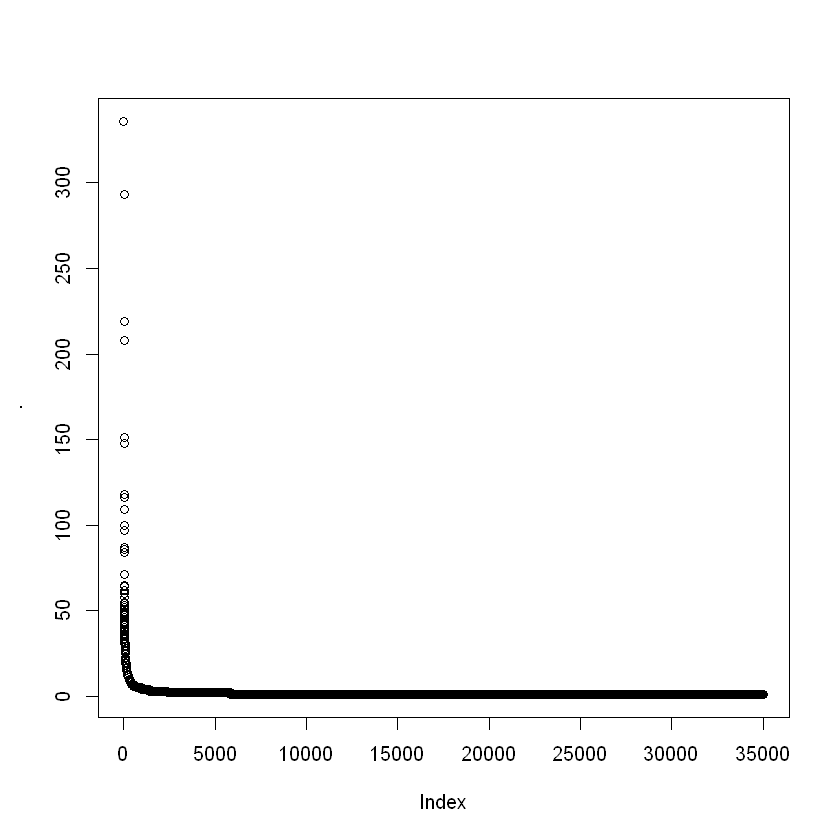

In [49]:
res %>% as.vector() %>% sort(decreasing=T) %>% plot()


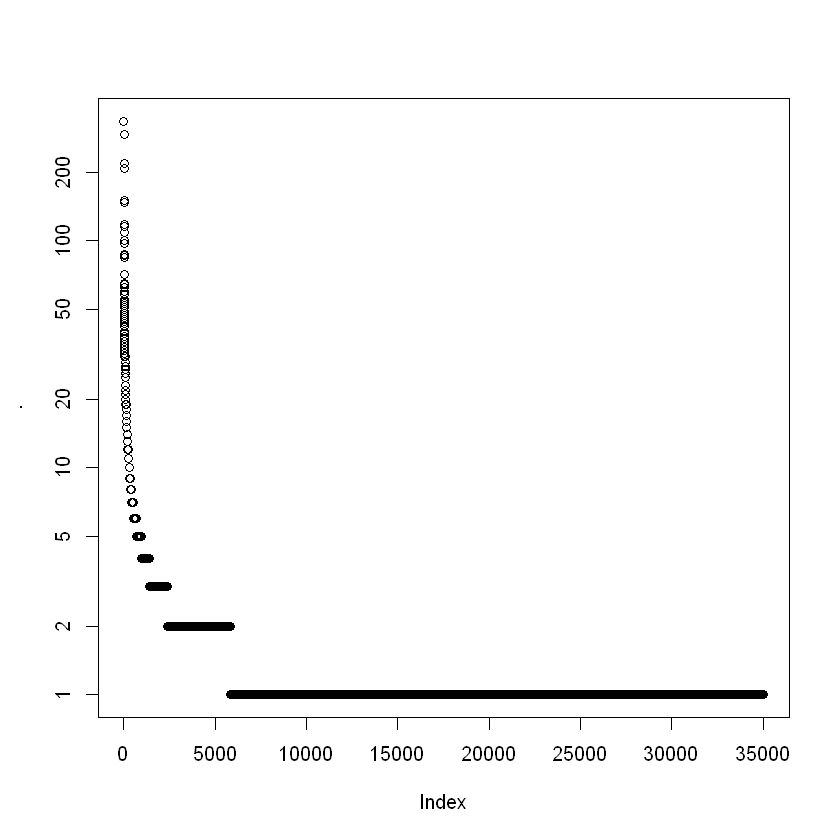

In [50]:
res %>% as.vector() %>% sort(decreasing=T) %>% plot(log='y')

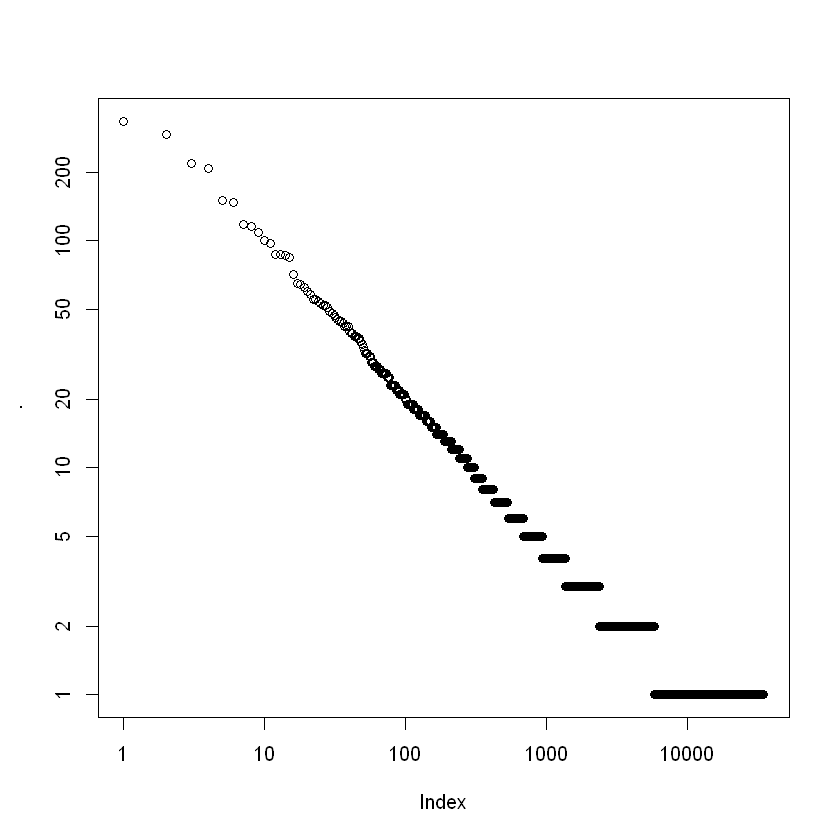

In [51]:
res %>% as.vector() %>% sort(decreasing=T) %>% plot(log='xy')

In [52]:
# 各部ごとに共起を集計する
part1 = map(kokoro_sentence[kokoro_sentence$part_id == 1,'content'], get_cooc, pos=c('名詞'), stopwords=stopwords) %>% unlist() %>% table()
part2 = map(kokoro_sentence[kokoro_sentence$part_id == 2,'content'], get_cooc, pos=c('名詞'), stopwords=stopwords) %>% unlist() %>% table()
part3 = map(kokoro_sentence[kokoro_sentence$part_id == 3,'content'], get_cooc, pos=c('名詞'), stopwords=stopwords) %>% unlist() %>% table()
part3 %>% head()

.
Ｋ-学年   Ｋ-後 Ｋ-向う   Ｋ-剛 Ｋ-仕方   Ｋ-情 
      1       1       1       2       1       1 

In [53]:
df1 = as.data.frame(part1)
df2 = as.data.frame(part2)
df3 = as.data.frame(part3)
res = merge(x=df1, y=df2, by='.', all=T)
res = merge(x=res, y=df3, by='.', all=T)
colnames(res) = c('term', 'df1', 'df2', 'df3')
res[is.na(res)] = 0

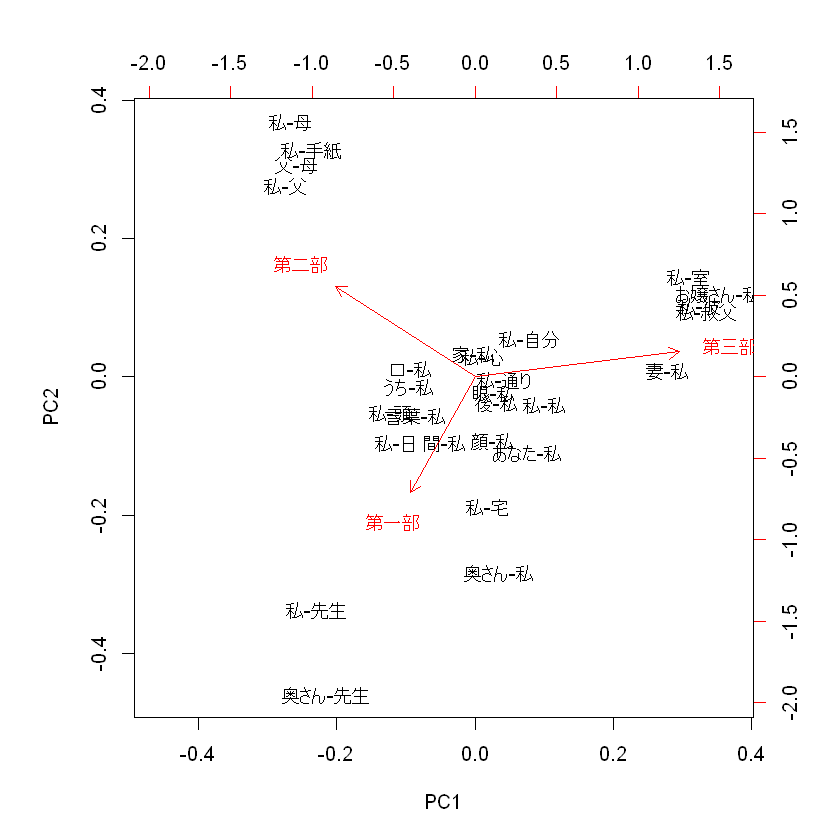

In [54]:
mat = res
row.names(mat) = mat[,1]
mat = mat[2:4]
mat = mat[rowSums(mat) > 50, ]
colnames(mat) = c('第一部','第二部','第三部')

mat_t = t(mat)

ratio = mat_t / colSums(mat)
ratio_t = t(ratio)
result = (ratio_t / colSums(ratio))  %>% prcomp()

biplot(result)
